In [1]:
from Library.DataAnalyzer import DataAnalyzer
from Library.DataPreprocessor import DataPreprocessor
from Library.DataVisualizer import DataVisualizer
from Library.ClassificationEngine import ClassificationEngine

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pandas as pd

In [2]:
preprocessor = DataPreprocessor()
analyzer = DataAnalyzer()
visualizer = DataVisualizer()
trainer = ClassificationEngine()

# Define classification algorithms
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
h = GradientBoostingClassifier()

# Add the algorithms you define to the array
myAlgorithmArray = [g, b, k, l, d, r, h] 

# Read File

In [3]:
df_train = pd.read_csv("Data/ttrain.csv")
df_test = pd.read_csv("Data/ttest.csv")

In [4]:
df_train.shape, df_test.shape 

((891, 12), (418, 11))

In [5]:
df_train.sample() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5,C104,S


In [6]:
df_test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
306,1198,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S


In [7]:
df = df_train.append(df_test)

In [8]:
df.shape 

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
analyzer.calculateNullValuesSum(df)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Fare", "isnull", None, df["Fare"].mean(), df["Fare"])

In [12]:
analyzer.calculateNullValuesSum(df)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [15]:
df = preprocessor.updateColumnValuesBasedOnCondition(df, "Embarked", "isnull", None, "S", df["Embarked"])

In [16]:
analyzer.calculateNullValuesSum(df)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
df.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [18]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

In [19]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [20]:
df.Title = df.Title.replace(["Ms", "Mlle"], "Miss")
df.Title = df.Title.replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df.Title = df.Title.replace(["Rev", "Jonkheer", "Don", "Sir", "Col", "Major", "Dr", "Capt", "Mr"])

In [21]:
df.Title.value_counts()

Miss      716
Mrs       461
Master    131
Mr          1
Name: Title, dtype: int64

In [22]:
analyzer.calculateNullValuesSum(df)

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [23]:
analyzer.findColumnsWithMissingValuesAboveThreshold(df, 75)

[('Cabin', 77.46371275783041)]

In [24]:
df = preprocessor.dropColumnsFromDataFrame(df, ["Cabin"])

In [25]:
analyzer.calculateNullValuesSum(df)

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

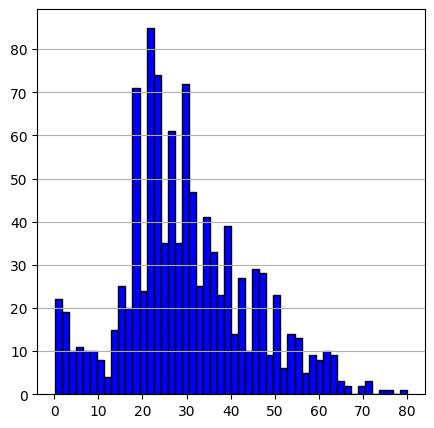

In [26]:
visualizer.draw_histogram_chart(df["Age"], 50, figure_height= 5, figure_width= 5)

In [27]:
df.Age.describe() 

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [28]:
df.groupby("Sex")["Age"].mean() 

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [29]:
df.Age = df.Age.fillna(df.groupby("Title")["Age"].transform("median"))

In [30]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
249,1141,NaN,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,32.0,1,0,2660,14.4542,C,Mrs
717,718,1.0,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,S,Miss
382,383,0.0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,S,Miss
106,998,NaN,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,Q,Mrs
87,88,0.0,3,"Slocovski, Mr. Selman Francis",male,32.0,0,0,SOTON/OQ 392086,8.0500,S,Mrs


In [31]:
df["Family"] = df.SibSp + df.Parch + 1 

In [32]:
analyzer.calculateNullValuesSum(df)

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [33]:
df = preprocessor.dropColumnsFromDataFrame(df, ["PassengerId", "Ticket", "Name"])

In [34]:
df.sample() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
77,NaN,1,female,55.0,2,0,25.7,S,Mrs,3


In [35]:
data =pd.get_dummies(df, drop_first=True) 

In [36]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,27.0,0,0,8.0500,1,1,0,1,1,0,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,0,1
416,NaN,3,32.0,0,0,8.0500,1,1,0,1,0,0,1


In [37]:
train = data[:891]
test = data[891:]

In [38]:
x = train.drop("Survived", axis=1)
y = train["Survived"]

In [39]:
test = test.drop("Survived", axis=1) 

In [40]:
trainer.fitAndPredictAll(myAlgorithmArray, x, y)

Classifier                    Accuracy Score    Precision Score
--------------------------  ----------------  -----------------
GaussianNB                          0.815642           0.816179
BernoulliNB                         0.815642           0.817483
KNeighborsClassifier                0.703911           0.697912
LogisticRegression                  0.826816           0.825597
DecisionTreeClassifier              0.782123           0.782745
RandomForestClassifier              0.832402           0.832402
GradientBoostingClassifier          0.849162           0.848537


In [41]:
h.fit(x,y)
tahmin = h.predict(test)

In [42]:
sonuc = df_test[["PassengerId"]] 

In [43]:
sonuc["Survived"] = tahmin 

In [44]:
sonuc["Survived"] = sonuc["Survived"].astype("int32") 

In [45]:
sonuc.to_csv("Result/titanic_prediction.csv", index= False)